# Focus Area 3 — Temperature Quality &amp; Microclimates
**Core Objective**: To demonstrate the advantages of high-resolution temperature data in
capturing microclimates and computing derived metrics like PET, for better assessment of heat-
related risks.

## Extract Temperature data
- GHCN data
- CBAM data
- ERA5 data
<br>

EA: March 2025 heatwave, linking to health impacts.

Use the current location and get the nearest GHCNd weather station and visualise the temperature over the last half a century

Require 2 files
- The Metadata file: TAHMO_Metadata.csv 
- The TAHMO data file: TAHMO_data.csv

Metadata file format (Columns):
<!DOCTYPE html>
<html>
<head>
    <title>TAHMO Metadata</title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Code</th>
            <th>Latitude</th>
            <th>Longitude</th>
        </tr>
        <tr>
            <td>TA00283</td>
            <td>1.2345</td>
            <td>36.7890</td>
        </tr>
        <!-- More rows as needed -->
    </table>
</html>

Data file format (Columns): Temperature / Precipitation data for multiple stations
<html>
<head>
    <title>TAHMO Data</title>
</head>
<body>
    <table border="1">
        <tr>
            <th>Date</th>
            <th>TA00283</th>
            <th>TA00284</th>
            <th>TA00285</th>
            <!-- More station codes as needed -->
        </tr>
        <tr>
            <td>2023-01-01</td>
            <td>25.3</td>
            <td>26.1</td>
            <td>24.8</td>
        </tr>
        <!-- More rows as needed -->
    </table>
</html>

In [8]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import json


In [9]:
from utils.GHCN_stations import subset_stations_in_bbox, get_nearest_wmo_station # GHCN station helper functions
from utils.filter_stations import RetrieveData

We are going to examine the March 2025 heatwave 


In [ ]:
# Station comparison
start_date = '2024-03-01'
end_date = '2024-03-31'

Extract the TAHMO temperature 5 minute data for 2024 and extrat the tmin, tavg and tmax

In [12]:
# Load TAHMO EAC stations previously extracted
eac_metadata = pd.read_csv("data/ground/eac_stations.csv")
eac_metadata = eac_metadata[['code', 
                             'location.latitude', 
                             'location.longitude']].rename(columns={'location.latitude': 'lat', 
                                                                    'location.longitude': 'lon'})

In [14]:
# Load the config file
with open('config.json', 'r') as f:
    config = json.load(f)

# Set the api key and secret
api_key = config['apiKey']
api_secret = config['apiSecret']


# Initialize the class
rd = RetrieveData(apiKey=api_key, 
                  apiSecret=api_secret)


# Get the temperature data for the EAC stations in 5min intervals
eac_temp = rd.multiple_measurements(stations_list=eac_metadata['code'].tolist(),
                                     startDate=start_date,
                                     endDate=end_date,
                                     variables=['te'],
                                     csv_file = "data/ground/eac_temp_march_2024.csv",
                                     aggregate='5min'
                                     )

Retrieving data for stations:   0%|          | 0/260 [00:00<?, ?it/s]

An error occurred: None: Max retries exceeded with url: /services/measurements/v2/stations/TA00074/measurements/controlled?start=2024-03-01T00%3A00%3A00Z&end=2024-03-30T23%3A55%3A00Z&variable=te (Caused by None)


In [15]:
# Aggregate the values to get the min, mean and max for the day
tahmo_eac_tmin = rd.aggregate_variables(
    eac_temp,
    freq='1D',
    method='min'
)
tahmo_eac_tavg = rd.aggregate_variables(
    eac_temp,
    freq='1D',
    method='mean'
)
tahmo_eac_tmax = rd.aggregate_variables(
    eac_temp,
    freq='1D',
    method='max'
)


AttributeError: 'NoneType' object has no attribute 'index'

In [ ]:
# Save the variables
tahmo_eac_tmin.to_csv("data/ground/eac_tmin_march_2024.csv", index=True)
tahmo_eac_tavg.to_csv("data/ground/eac_tavg_march_2024.csv", index=True)
tahmo_eac_tmax.to_csv("data/ground/eac_tmax_march_2024.csv", index=True)

### GHCNd stations 
- Available globally

In [ ]:
# !git clone https://github.com/scotthosking/get-station-data.git

Cloning into 'get-station-data'...


In [3]:
import sys

sys.path.append('get-station-data')

from get_station_data import ghcnd
from get_station_data.util import nearest_stn

%matplotlib inline

In [5]:
stn_md = ghcnd.get_stn_metadata()
# stn_md

# Format the data rename lat and lon to latitude and longitude
stn_md = stn_md.rename(columns={'lat': 'latitude', 'lon': 'longitude'})

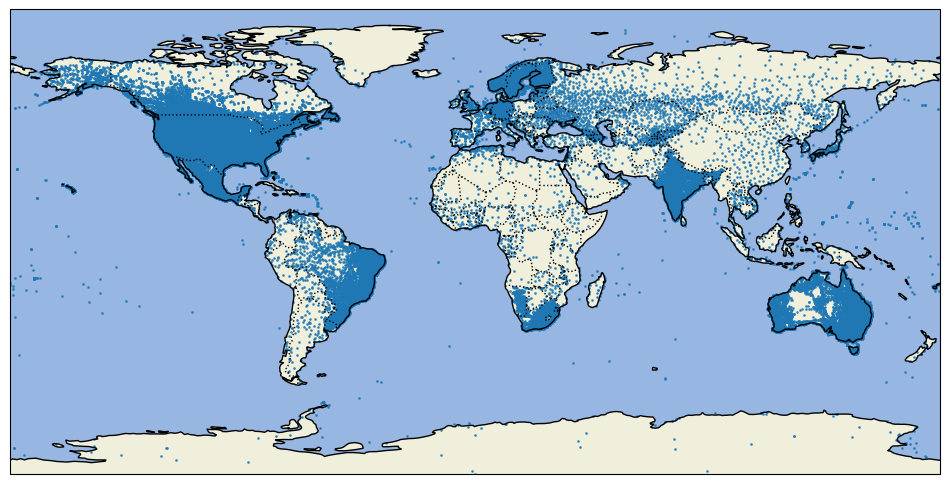

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Add world map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

# Plot the NOAA stations
ax.scatter(stn_md['lon'], stn_md['lat'], s=0.9, alpha=.8, transform=ccrs.PlateCarree())
plt.show()


In [ ]:
# Nairobi coordinates
nairobi_coords = (-1.2921, 36.8219)
nearest_stn(nairobi_coords, stn_md)


In [5]:
# Get the nearest station

#### Compare the temperature of TAHMO station/WMO station with the Met Agency data

In [ ]:
# Compare the temperatures

: 

### Extract CBAM temperature data (2012 -2024)

### Extract ERA5 temperature data (1980-2025)

## Data Processing

1. Ground (GHCN/TAHMO/your station) vs CBAM/ERA5 
2. PET comparison plot (CBAM vs ERA5)
3. Count of heat/agri stress days --- Plot of the heat exchange